<a href="https://colab.research.google.com/github/Maryam-71295/House-Prediction/blob/main/House_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load train and Test set
df = pd.read_csv("/content/drive/MyDrive/train.csv")

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
l=df.isnull().sum()

In [7]:
columns_name=df.columns
numerical_column=[]
categorical_column=[]
for i in columns_name:
    if df[i].dtype=='O':
        categorical_column.append(i)
    else:
        numerical_column.append(i)

In [8]:
for i in categorical_column:
    print(i,df[i].value_counts())
    print('\n')

MSZoning MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64


Street Street
Pave    1454
Grvl       6
Name: count, dtype: int64


Alley Alley
Grvl    50
Pave    41
Name: count, dtype: int64


LotShape LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64


LandContour LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64


Utilities Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64


LotConfig LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64


LandSlope LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64


Neighborhood Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      3

In [9]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

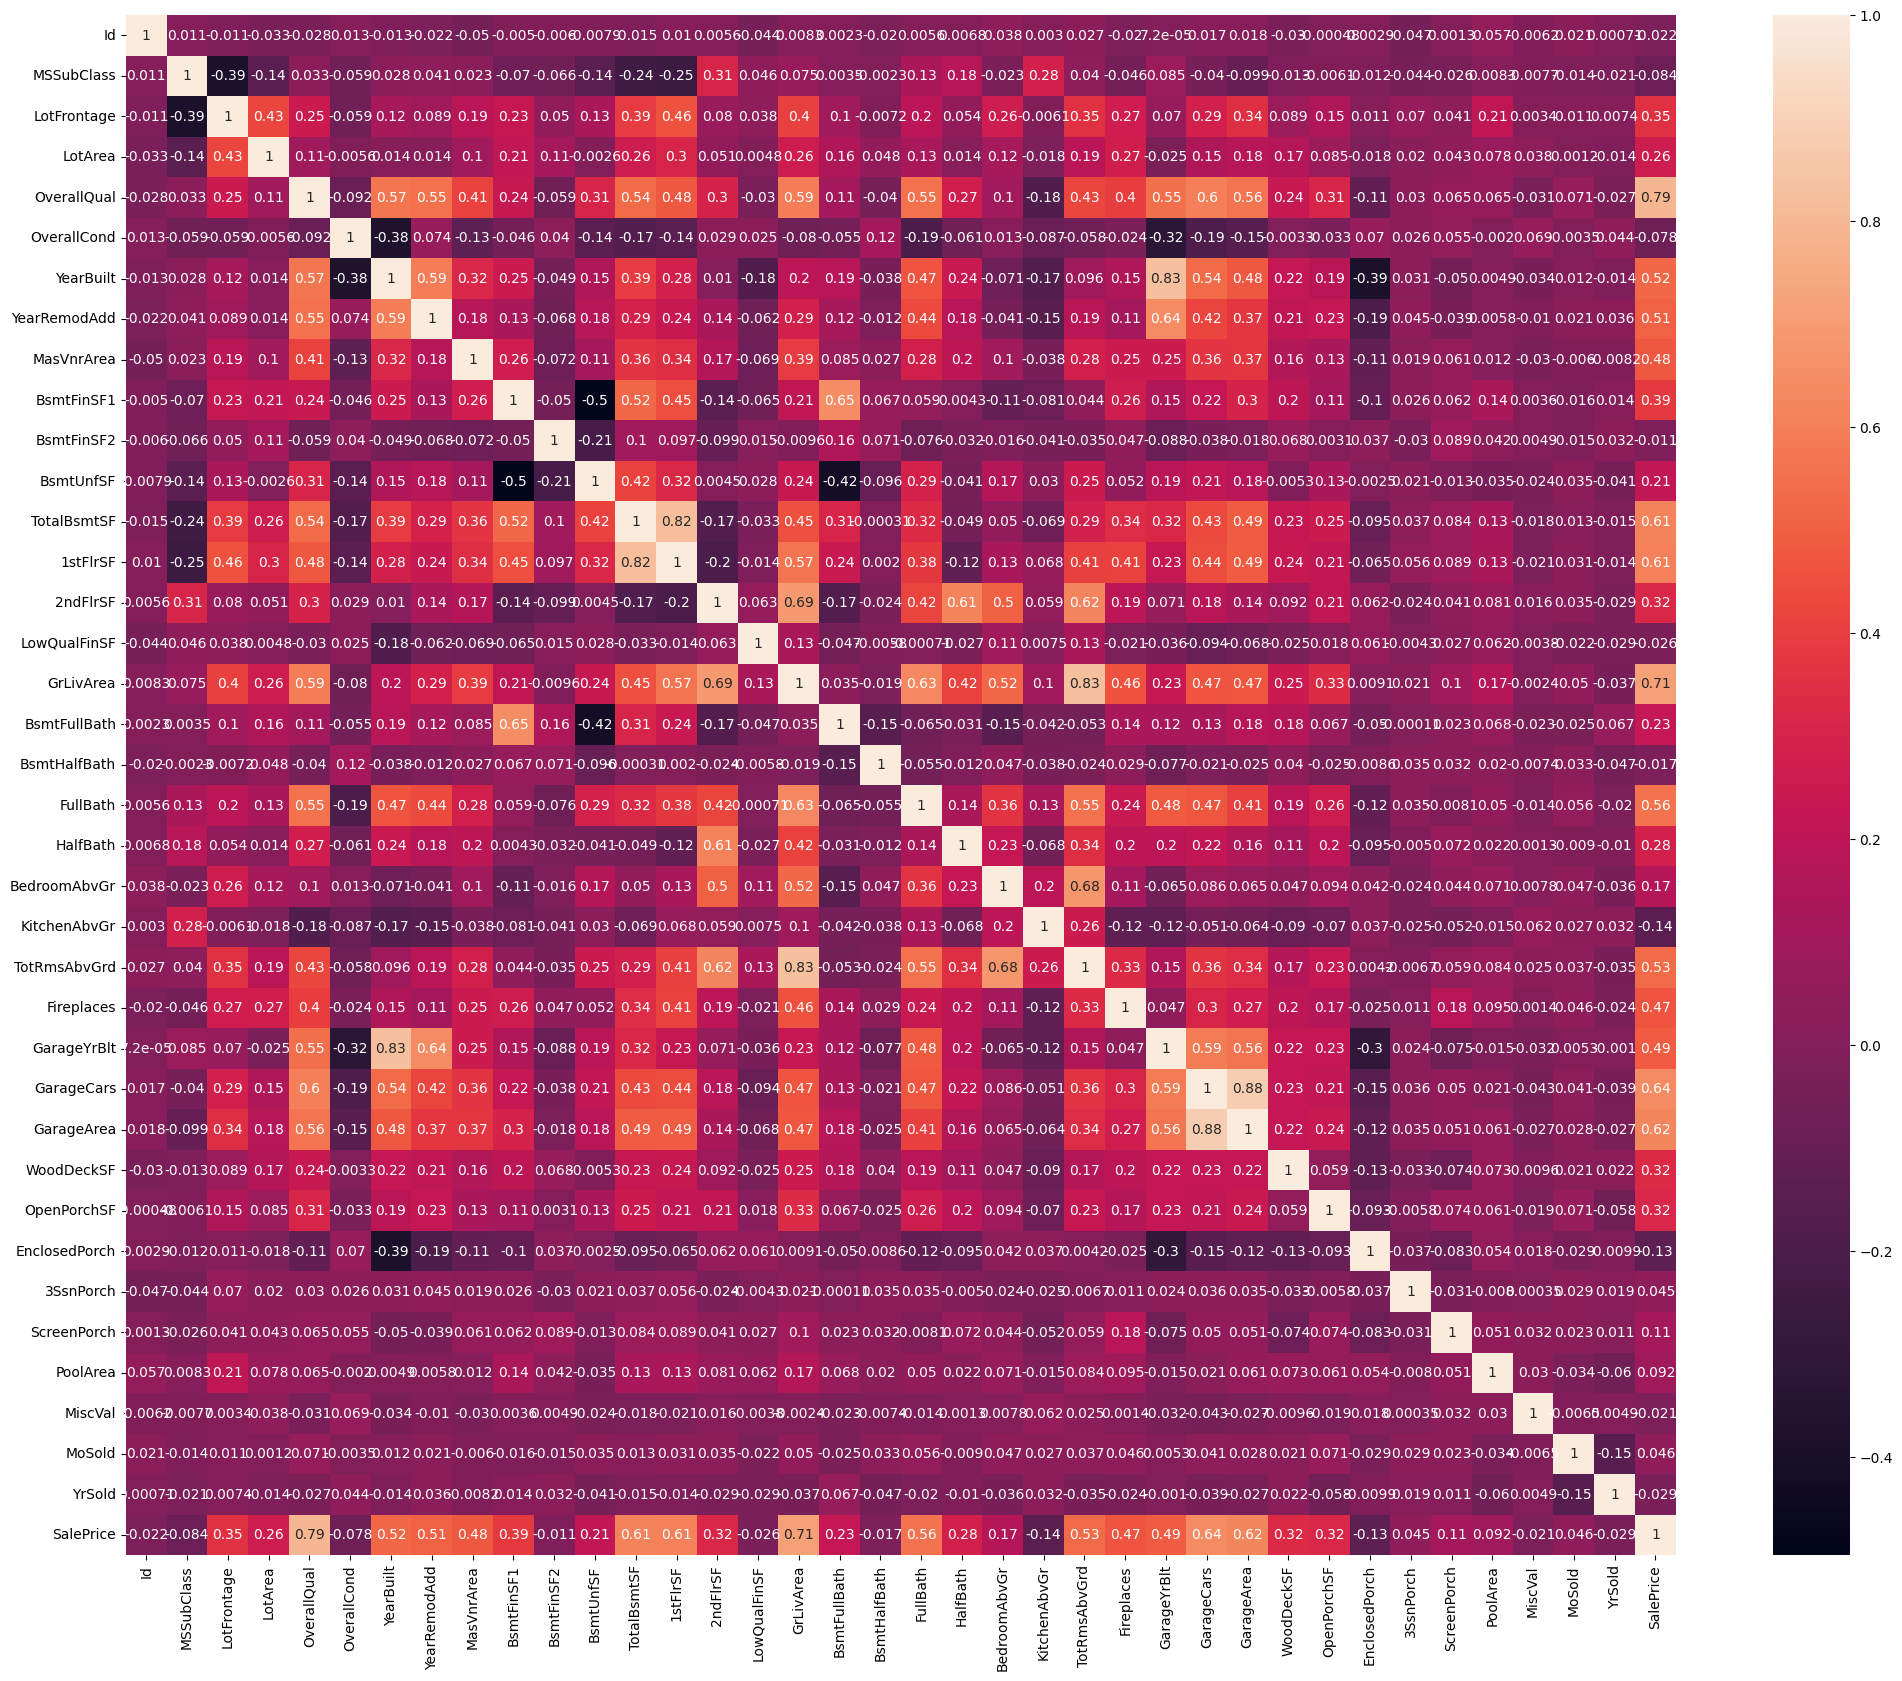

In [11]:
plt.figure(figsize=(25, 20))
sns.heatmap(df[numerical_column].corr(),annot=True)
plt.show()

In [12]:
l=df[numerical_column].corr()['SalePrice']
y=l.index
imp_columns=[]
for i in y:
    if l[i]>0.5:
        imp_columns.append(i)

In [13]:
len(imp_columns)

11

In [14]:
imp_columns

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [15]:
df_new=df[imp_columns]

In [16]:
df_new

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,175000
1456,6,1978,1988,1542,2073,2073,2,7,2,500,210000
1457,7,1941,2006,1152,1188,2340,2,9,1,252,266500
1458,5,1950,1996,1078,1078,1078,1,5,1,240,142125


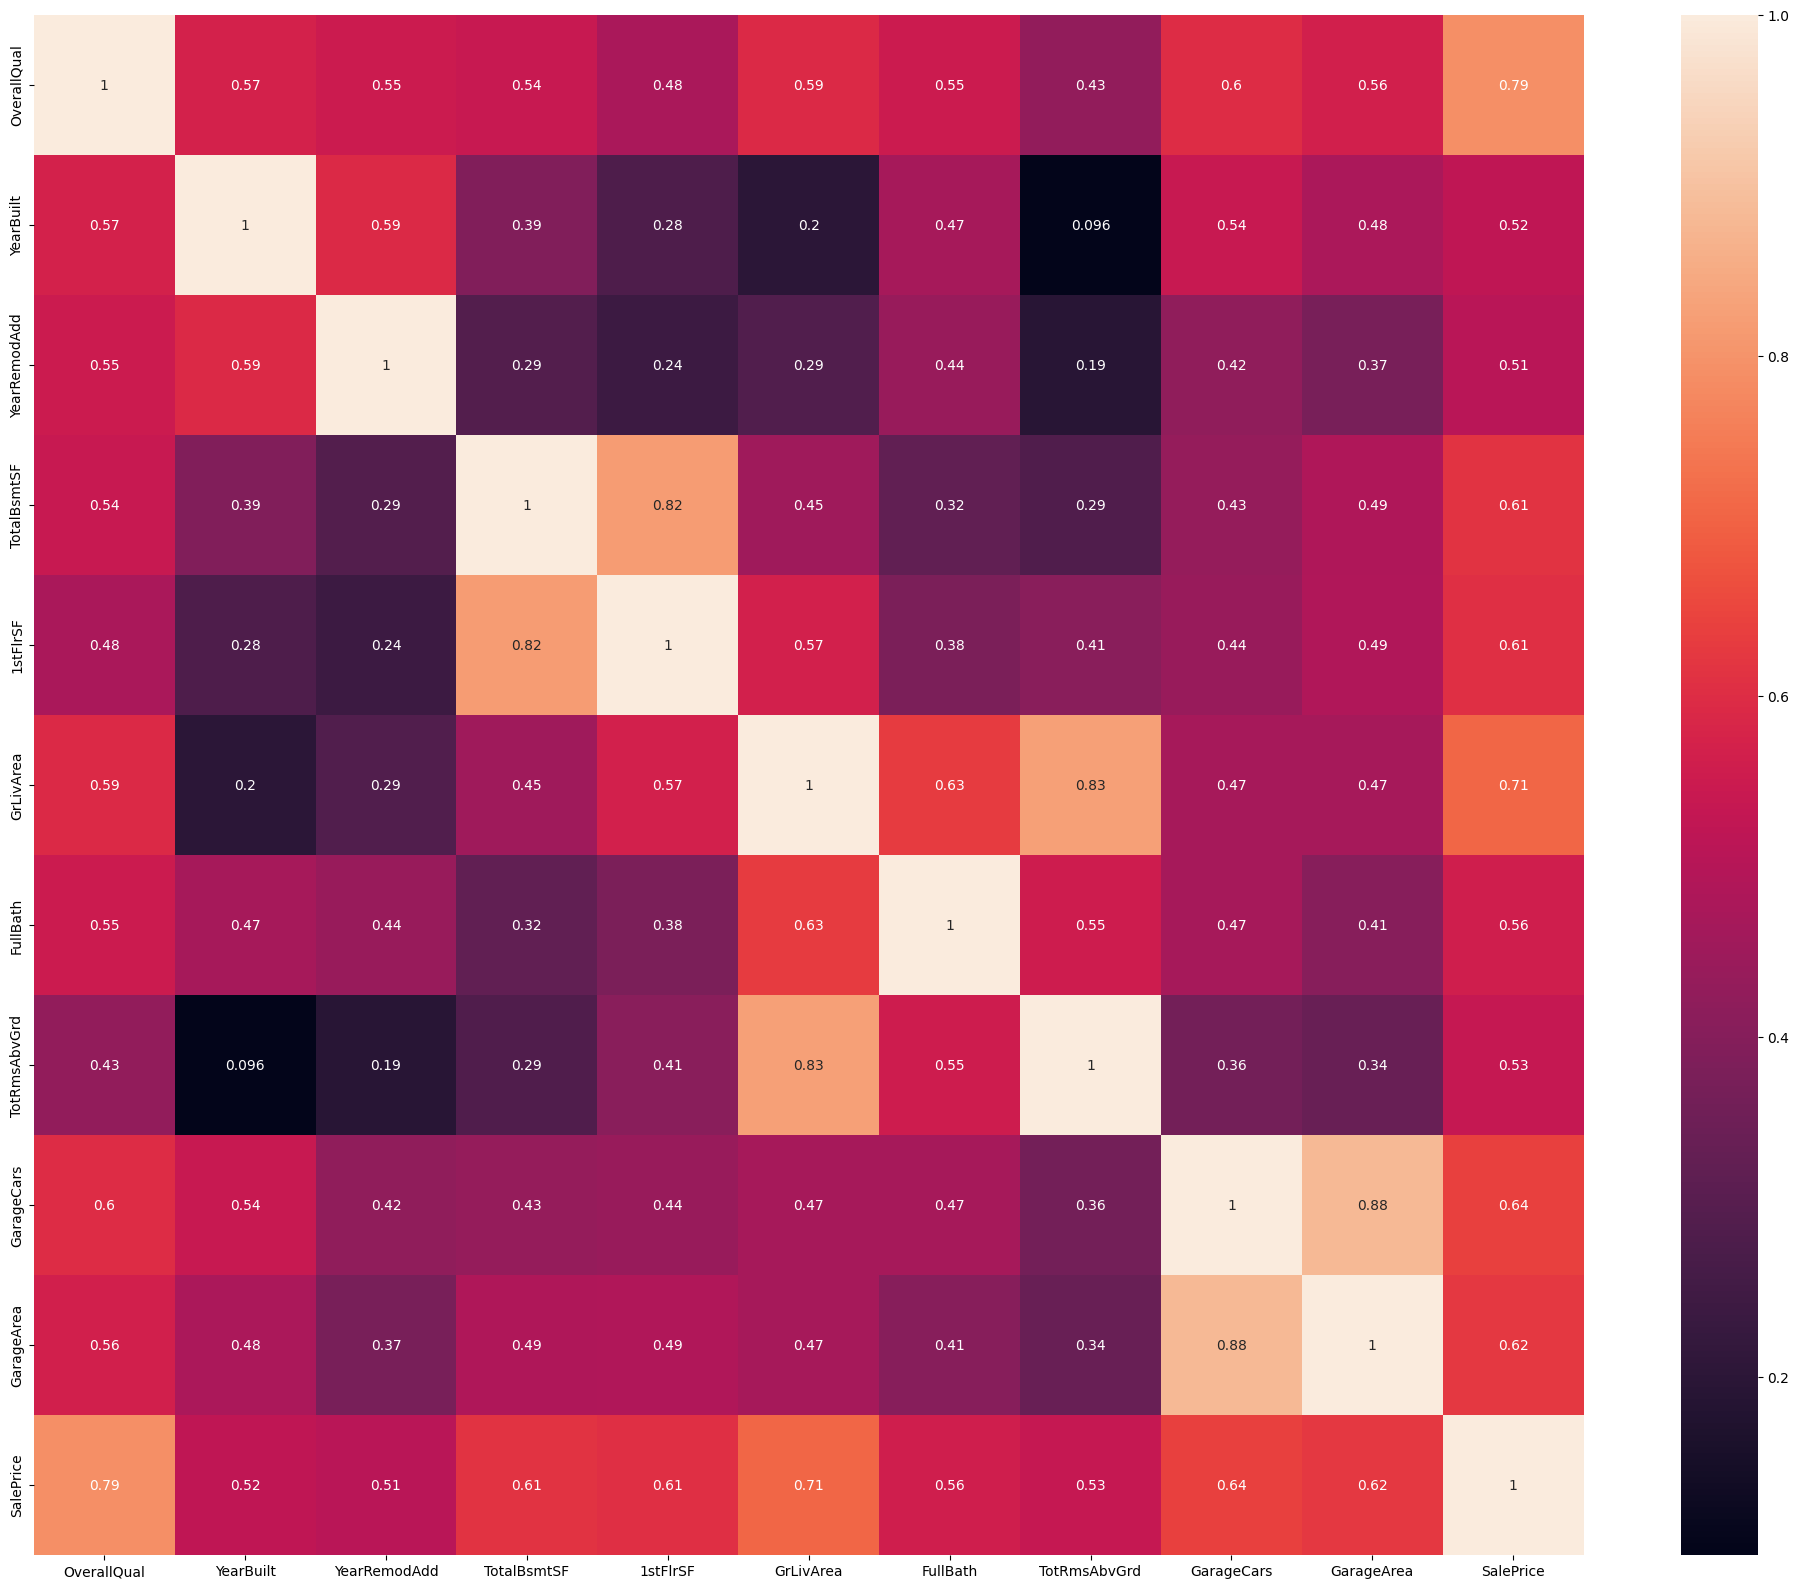

In [17]:
plt.figure(figsize=(25, 20))
sns.heatmap(df_new.corr(),annot=True)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X=df_new.drop(columns=['SalePrice'])
y=df_new['SalePrice']

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test is the actual values and y_pred is the predicted values
def evaluate_regression_model(y_test, y_pred):
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print the metrics
    print("Model Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R²): {r2:.2f}")

In [22]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred=dtr.predict(X_test)
evaluate_regression_model(y_test, y_pred)

Model Performance:
Mean Absolute Error (MAE): 26290.86
Mean Squared Error (MSE): 1869602662.72
Root Mean Squared Error (RMSE): 43238.90
R-squared (R²): 0.76


In [23]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
evaluate_regression_model(y_test, y_pred)

Model Performance:
Mean Absolute Error (MAE): 24774.22
Mean Squared Error (MSE): 1558239575.15
Root Mean Squared Error (RMSE): 39474.54
R-squared (R²): 0.80


In [24]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)
evaluate_regression_model(y_test, y_pred)

Model Performance:
Mean Absolute Error (MAE): 18759.84
Mean Squared Error (MSE): 844030927.42
Root Mean Squared Error (RMSE): 29052.21
R-squared (R²): 0.89


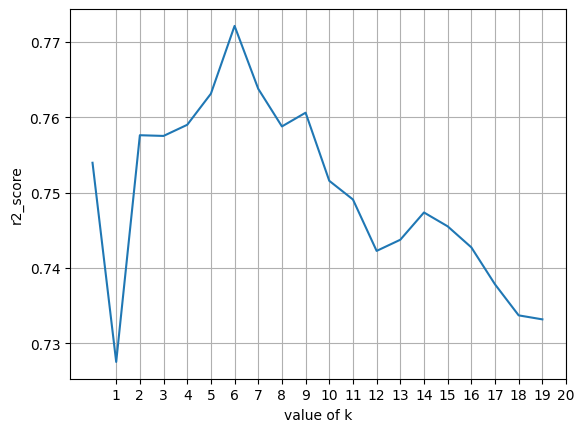

In [25]:
from sklearn.neighbors import KNeighborsRegressor
accuracy=[]
for i in range(1,21):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    accuracy.append(r2_score(y_test, y_pred))
plt.plot(accuracy)
plt.xticks(range(1,21))
plt.xlabel("value of k")
plt.ylabel("r2_score")
plt.grid()
plt.show()

In [26]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
evaluate_regression_model(y_test, y_pred)

Model Performance:
Mean Absolute Error (MAE): 25787.41
Mean Squared Error (MSE): 1748069394.50
Root Mean Squared Error (RMSE): 41809.92
R-squared (R²): 0.77


In [27]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_pred=gbr.predict(X_test)
evaluate_regression_model(y_test, y_pred)

Model Performance:
Mean Absolute Error (MAE): 19019.21
Mean Squared Error (MSE): 865842980.61
Root Mean Squared Error (RMSE): 29425.21
R-squared (R²): 0.89


In [28]:
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression()
lor.fit(X_train,y_train)
y_pred=lor.predict(X_test)
evaluate_regression_model(y_test, y_pred)

Model Performance:
Mean Absolute Error (MAE): 35329.52
Mean Squared Error (MSE): 2498674405.06
Root Mean Squared Error (RMSE): 49986.74
R-squared (R²): 0.67


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


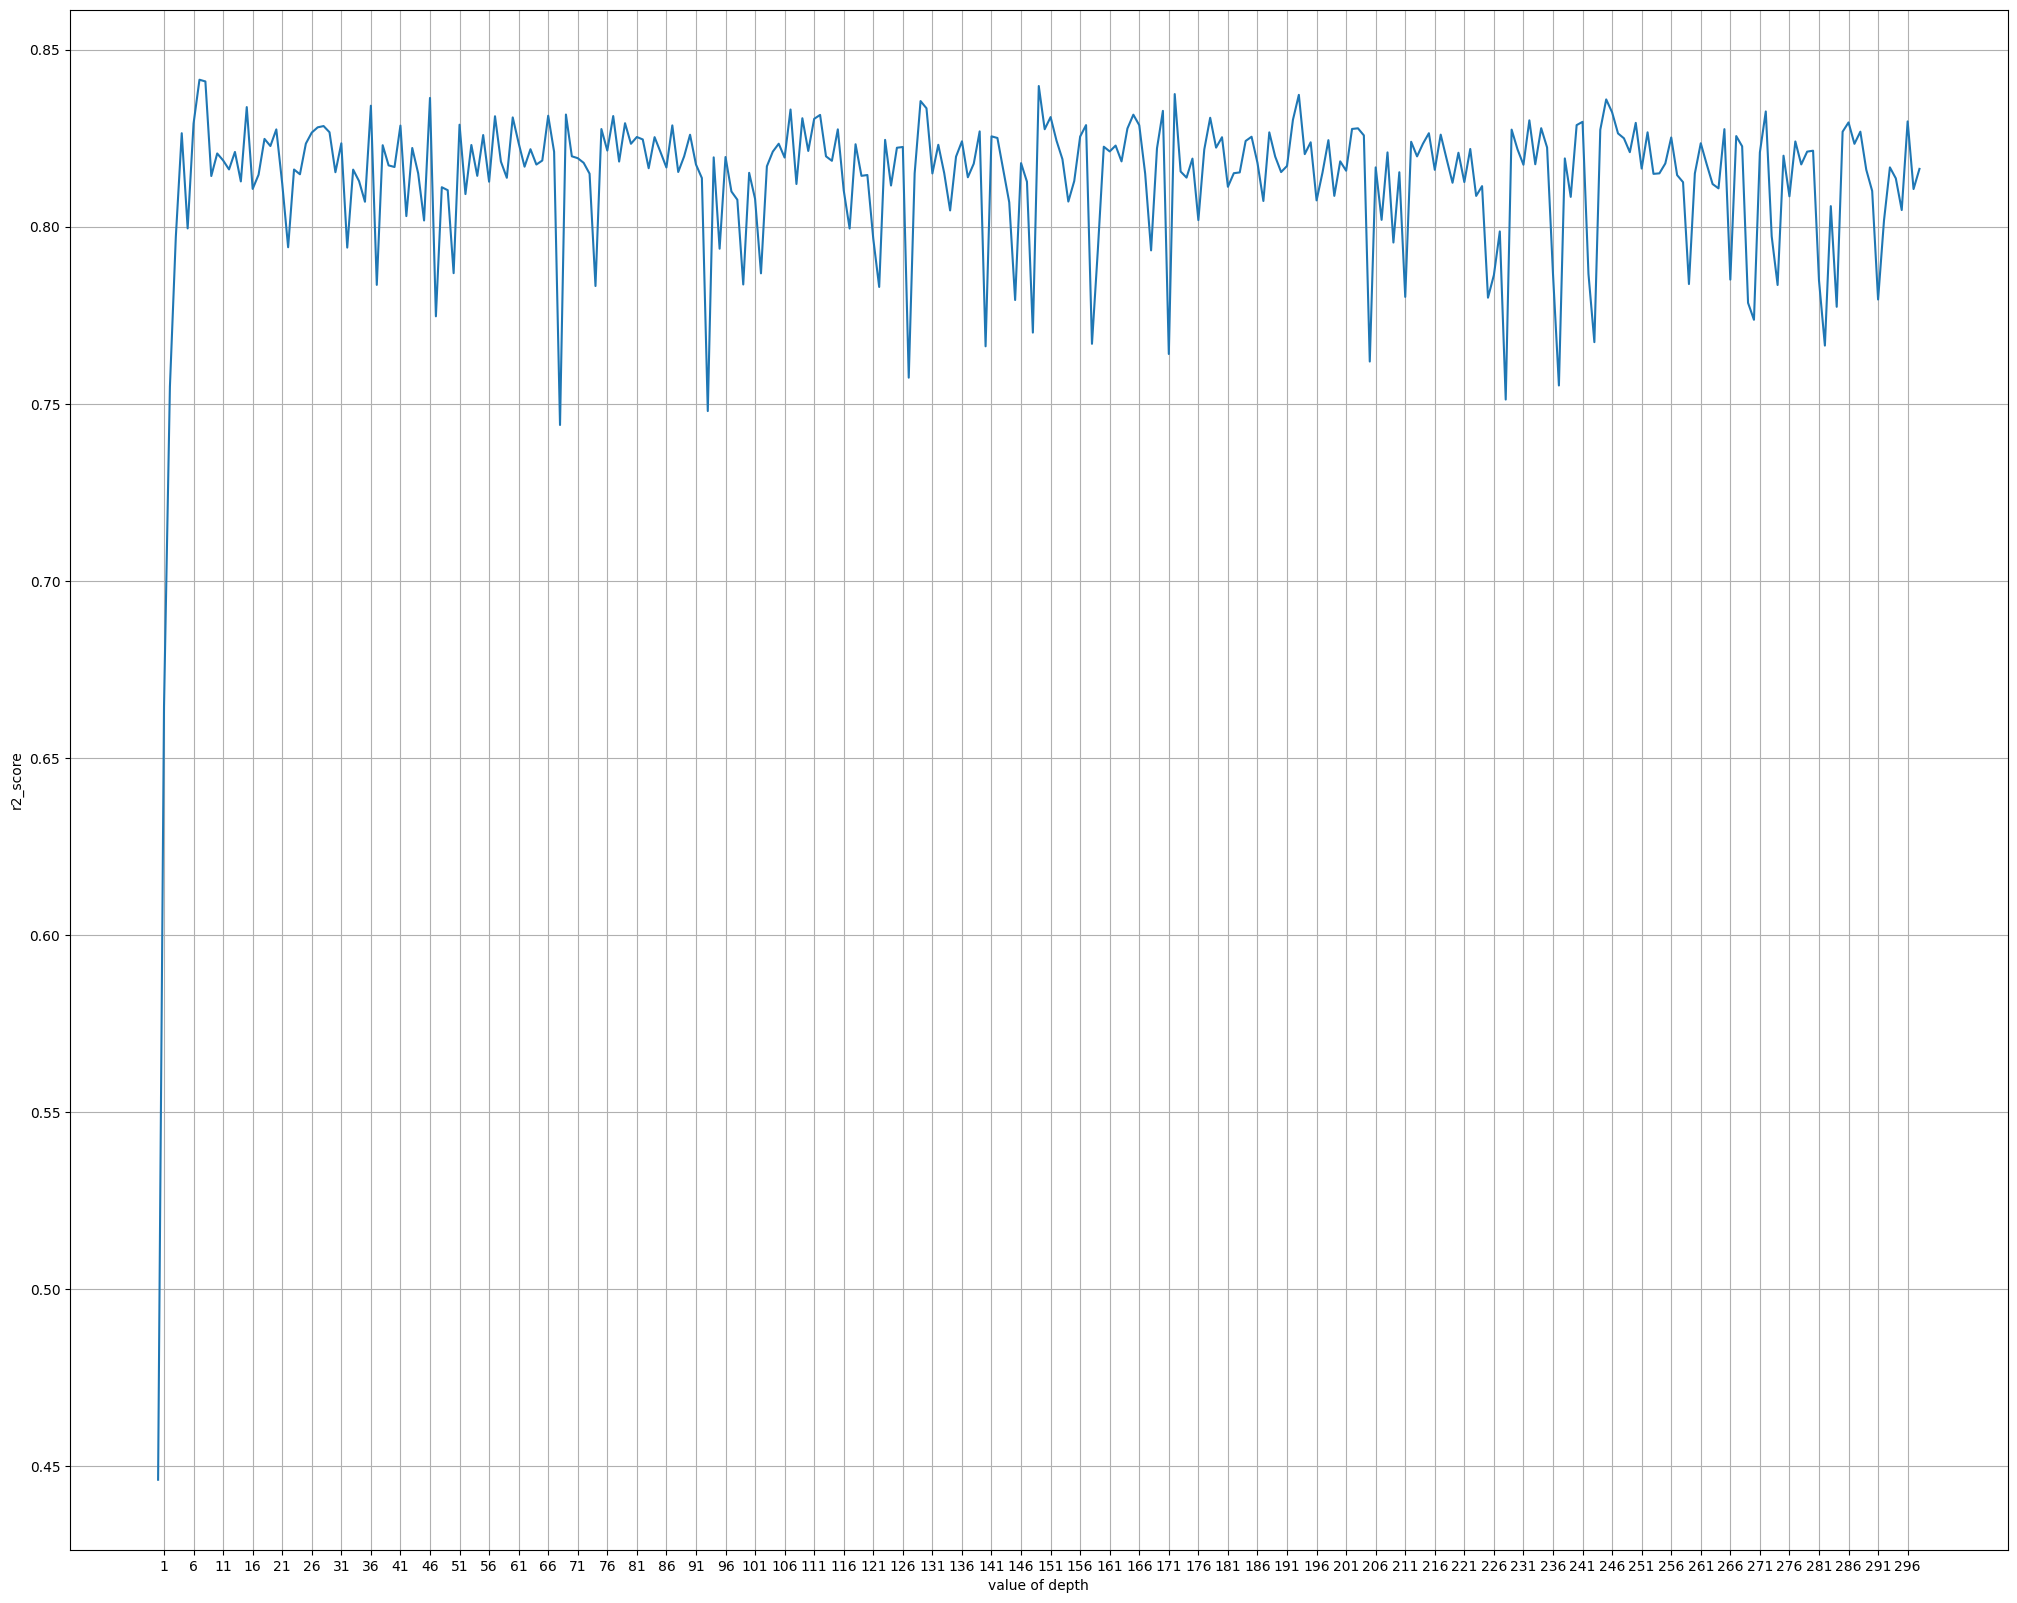

In [29]:
accuracy=[]
from sklearn.tree import DecisionTreeRegressor

for i in range(1,300):
    dtr=DecisionTreeRegressor(max_depth=i)
    dtr.fit(X_train,y_train)
    y_pred=dtr.predict(X_test)
    accuracy.append(r2_score(y_test, y_pred))
plt.figure(figsize=(25, 20))
plt.plot(accuracy)
plt.xticks(range(1,300,5))
plt.xlabel("value of depth")
plt.ylabel("r2_score")
plt.grid()
plt.show()

In [30]:
dtr=DecisionTreeRegressor(max_depth=6)
dtr.fit(X_train,y_train)
y_pred=dtr.predict(X_test)
evaluate_regression_model(y_test, y_pred)

Model Performance:
Mean Absolute Error (MAE): 24891.06
Mean Squared Error (MSE): 1294900938.40
Root Mean Squared Error (RMSE): 35984.73
R-squared (R²): 0.83


In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
tree = DecisionTreeRegressor()

# Define a grid of hyperparameters
param_grid = {
    "max_depth": [6],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": [None, "sqrt", "log2"],
    "ccp_alpha": [0.0, 0.01, 0.1]
}

# Perform Grid Search
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'ccp_alpha': 0.0, 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score: 0.7476472798865196


In [32]:
dtr=DecisionTreeRegressor(ccp_alpha= 0.01, max_depth = 10, max_features='log2', min_samples_leaf= 1, min_samples_split =5)
dtr.fit(X_train,y_train)
y_pred=dtr.predict(X_test)
evaluate_regression_model(y_test, y_pred)

Model Performance:
Mean Absolute Error (MAE): 25599.61
Mean Squared Error (MSE): 1471840102.79
Root Mean Squared Error (RMSE): 38364.57
R-squared (R²): 0.81


In [33]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)
evaluate_regression_model(y_test, y_pred)

Model Performance:
Mean Absolute Error (MAE): 19126.84
Mean Squared Error (MSE): 915273546.06
Root Mean Squared Error (RMSE): 30253.49
R-squared (R²): 0.88


In [34]:
print(rfr.max_features)
print(rfr.min_samples_leaf)
print(rfr.min_samples_split)
print(rfr.n_estimators)

1.0
1
2
100


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100],          # Number of trees
    'max_depth': [10, 20, 30],         # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],         # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],           # Minimum samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'] # Number of features to consider
}

# Define the GridSearchCV with R² as the scoring metric
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='r2',      # Use R² as the metric
    cv=5,              # 5-fold cross-validation
    verbose=2,         # Show progress
    n_jobs=-1          # Use all available processors
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best hyperparameters and corresponding R² score

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
135 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
84 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100]},
             scoring='r2', verbose=2)

In [36]:
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score (on validation set):", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
r2_test = r2_score(y_test, best_model.predict(X_test))
print("R² Score (on test set):", r2_test)

Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best R² Score (on validation set): 0.8218227778438191
R² Score (on test set): 0.876904395825733


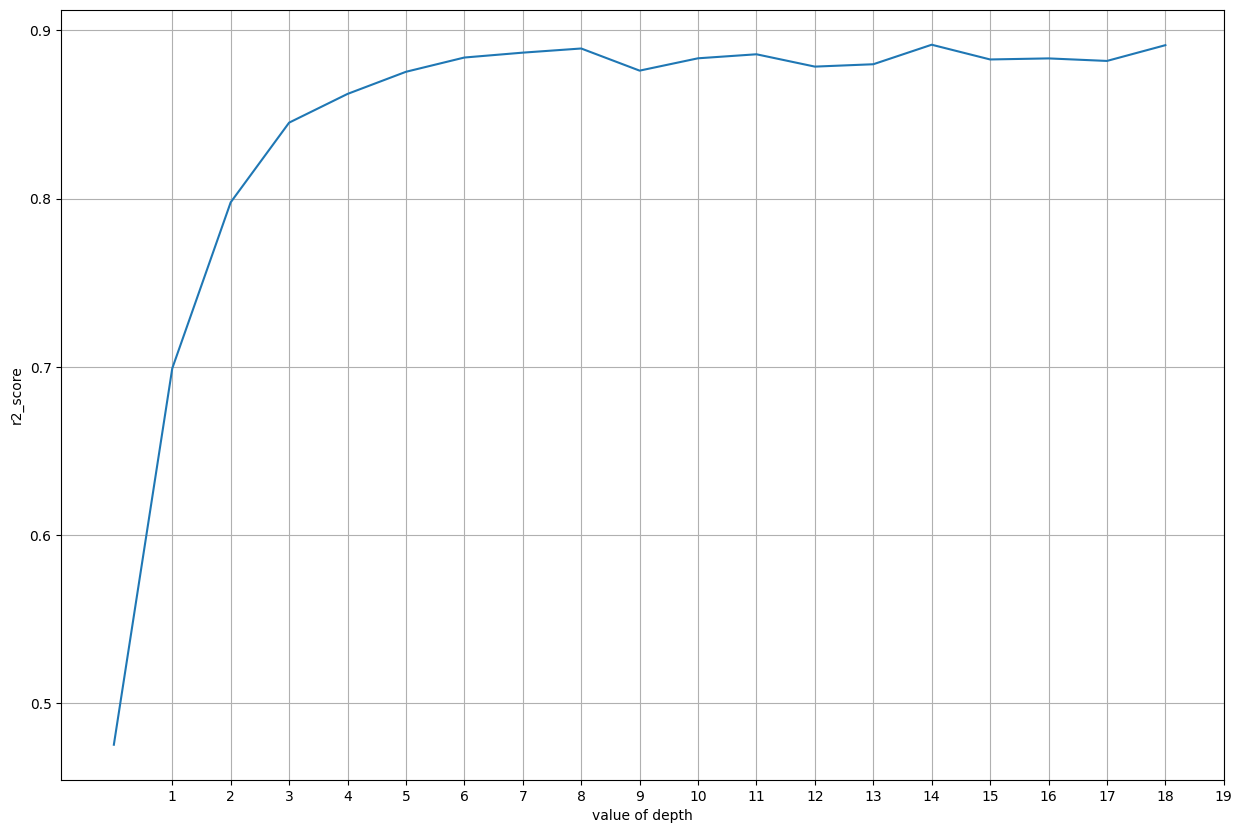

In [37]:
accuracy=[]
from sklearn.ensemble import RandomForestRegressor

for i in range(1,20):
    rf = RandomForestRegressor(max_depth=i)
    rf.fit(X_train,y_train)
    y_pred=rf.predict(X_test)
    accuracy.append(r2_score(y_test, y_pred))
plt.figure(figsize=(15, 10))
plt.plot(accuracy)
plt.xticks(range(1,20))
plt.xlabel("value of depth")
plt.ylabel("r2_score")
plt.grid()
plt.show()

In [38]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(max_depth=7)
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)
evaluate_regression_model(y_test, y_pred)

Model Performance:
Mean Absolute Error (MAE): 19352.36
Mean Squared Error (MSE): 920181538.58
Root Mean Squared Error (RMSE): 30334.49
R-squared (R²): 0.88


In [39]:
# Generate synthetic data
np.random.seed(42)
X = np.random.rand(1000, 5)  # 5 features
y = X @ np.array([300, 200, -150, 100, 50]) + np.random.rand(1000) * 1000  # Target with some noise

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
import joblib
import h5py

# Save Decision Tree Regressor
dtr_filename = 'decision_tree_model.h5'
joblib.dump(dtr, dtr_filename)

['decision_tree_model.h5']

In [41]:
# Save Random Forest Regressor
rfr_filename = 'random_forest_model.h5'
joblib.dump(rfr, rfr_filename)

['random_forest_model.h5']

In [42]:
# Save Gradient Boosting Regressor
gbr_filename = 'gradient_boosting_model.h5'
joblib.dump(gbr, gbr_filename)

['gradient_boosting_model.h5']

In [43]:
# Save KNN Regressor
knn_filename = 'knn_model.h5'
joblib.dump(knn, knn_filename)

['knn_model.h5']

In [44]:
# Save Linear Regression
lr_filename = 'linear_regression_model.h5'
joblib.dump(lr, lr_filename)

['linear_regression_model.h5']

In [45]:
# Save Logistic Regression
lor_filename = 'logistic_regression_model.h5'
joblib.dump(lor, lor_filename)

['logistic_regression_model.h5']